# Main Libraries

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import os 

## model selection
from sklearn.model_selection import train_test_split

## metrics
from sklearn.metrics import mean_squared_error, r2_score

## preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## model
from sklearn.linear_model import LinearRegression, SGDRegressor

## Load the data and look at the big picture

In [2]:
file_path=os.path.join(os.getcwd(),'housing.csv')
df_housing=pd.read_csv(file_path)

In [3]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
## chech nulls
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### comment: it seems that the dataset has 20640 instances and only 207 null values are in total_bedrooms feature, and also all dataypes are float64 as they are continous numerical values excpet ocean_proximity which is nominal categorical feature

# Exploratory Data Analysis (EDA)

### univariate visulaization

Categoris of ocean_proximity ---
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
********************************************************************************


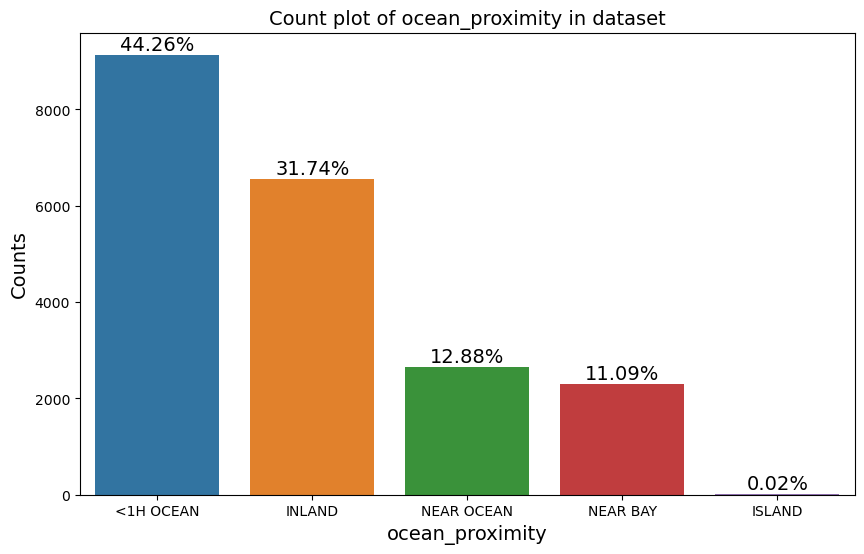

In [7]:
## check the distriburion of ocean_proximity 
ocean_values= df_housing['ocean_proximity'].value_counts()
print('Categoris of ocean_proximity ---\n', ocean_values)
print('**'*40)

## plotting
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)
plt.title('Count plot of ocean_proximity in dataset', fontsize=14, c='k')
plt.xlabel('ocean_proximity',fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
## showing the precentage

for i in range (ocean_values.shape[0]):
    count=ocean_values[i]
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0])
    plt.text(i,count+100, strt, ha='center', color='black', fontsize=14)

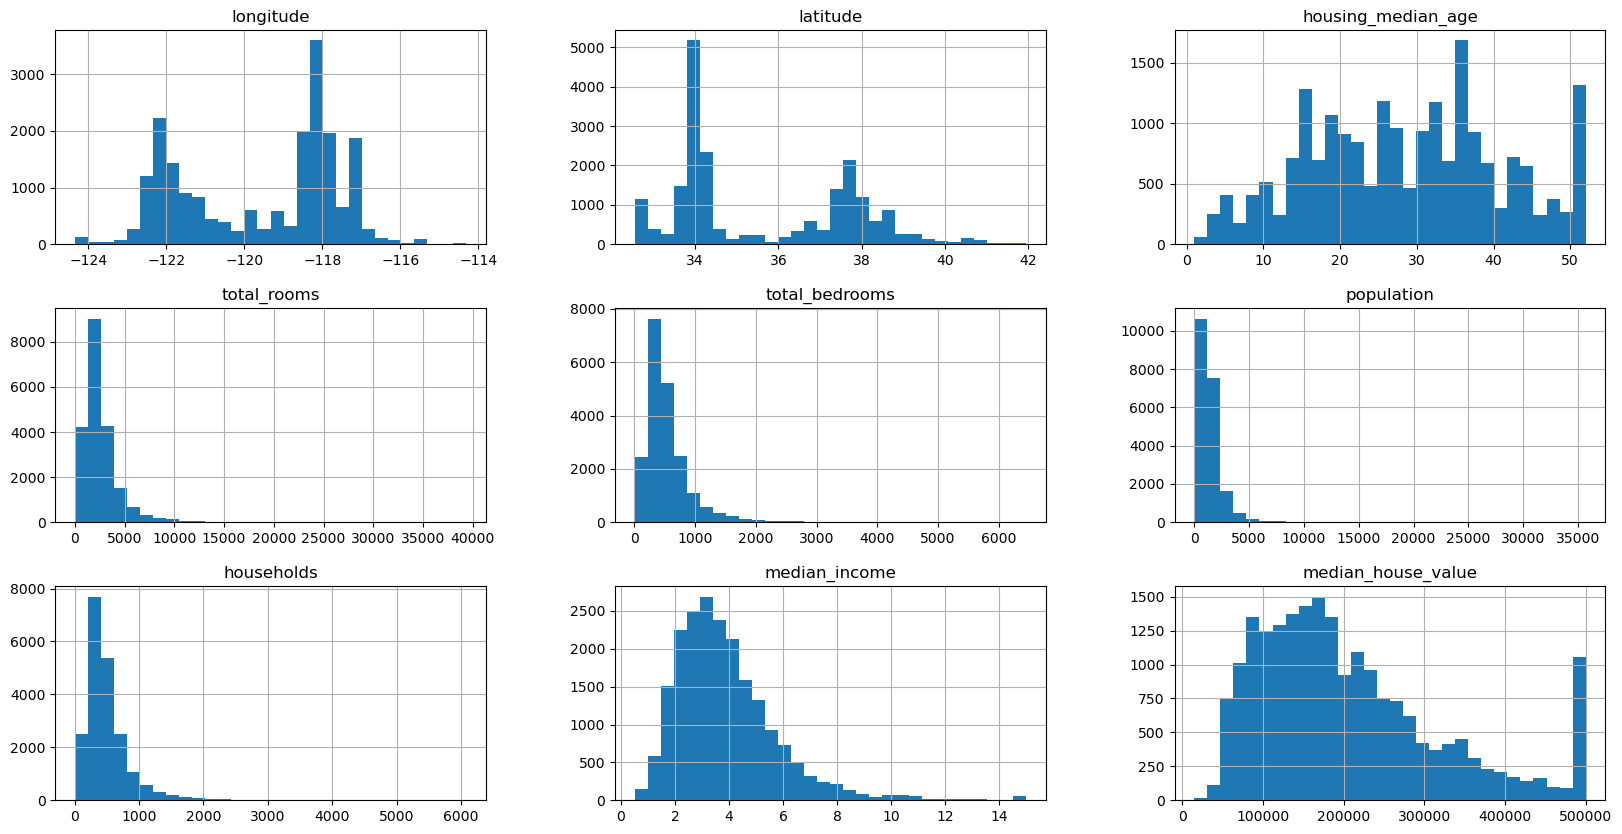

In [8]:
## Histogram Distribution of numerical values

df_housing.hist(bins=30, figsize=(20,10))
plt.show()

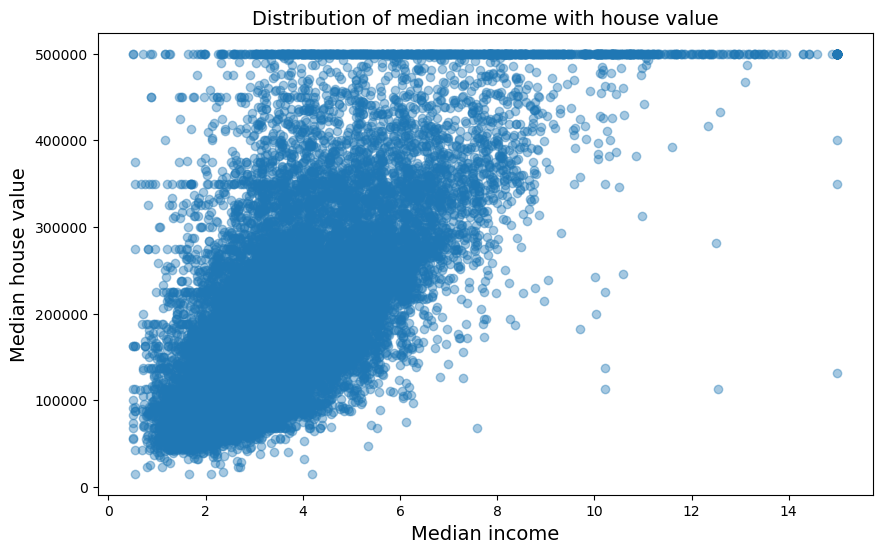

In [9]:
## scatter plot wih meadin_income and median_house_value
plt.figure(figsize=(10,6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.4)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median income',fontsize=14, c='k')
plt.ylabel('Median house value', fontsize=14, c='k')
plt.show()

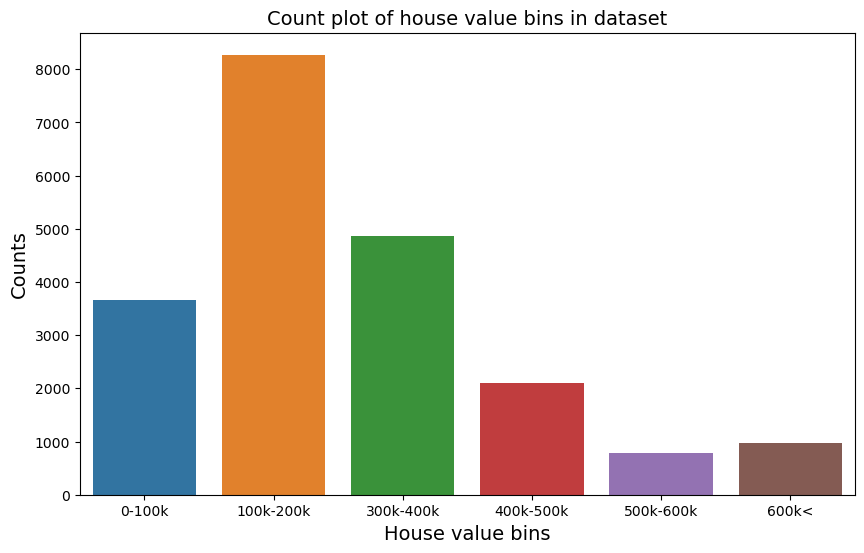

In [10]:
## convert median_house_value to bins
house_value_bins= pd.cut(x=df_housing['median_house_value'],
                        bins=[0,100000,200000,300000,400000,500000,np.inf],
                        labels=['0-100k','100k-200k','300k-400k','400k-500k','500k-600k','600k<'])
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title('Count plot of house value bins in dataset', fontsize=14, c='k')
plt.xlabel('House value bins',fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

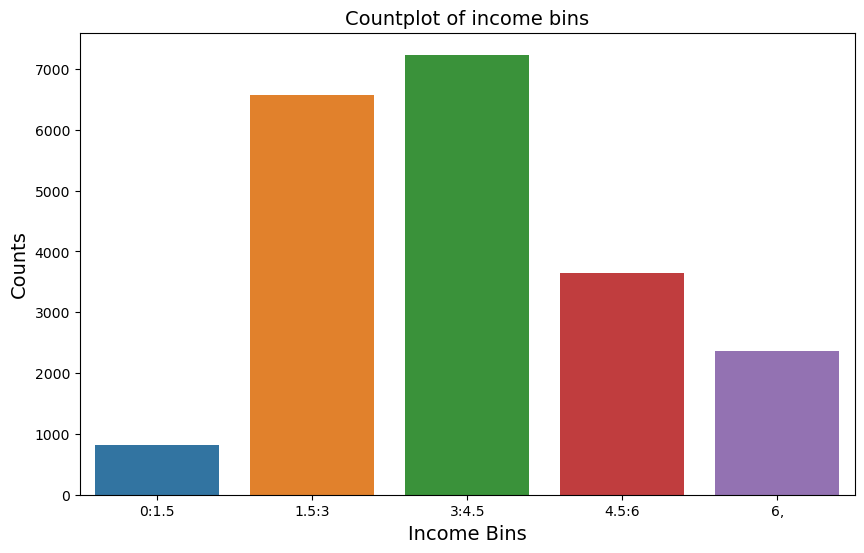

In [11]:
## convert median_income to bins
income_bins=pd.cut(x=df_housing['median_income'],
                  bins=[0, 1.5, 3, 4.5, 6, np.inf],
                  labels=['0:1.5','1.5:3', '3:4.5', '4.5:6', '6,'])
plt.figure(figsize=(10,6))
sns.countplot(x=income_bins)
plt.title('Countplot of income bins', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

##### It seems that (<H ocean) is about half of the dataset , also it seems that the distribution of most of features are right skewed, and the majority of house_value is between (100k : 200k) and the median_income is between (3 : 4.5).

# Bivariate Visualization

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


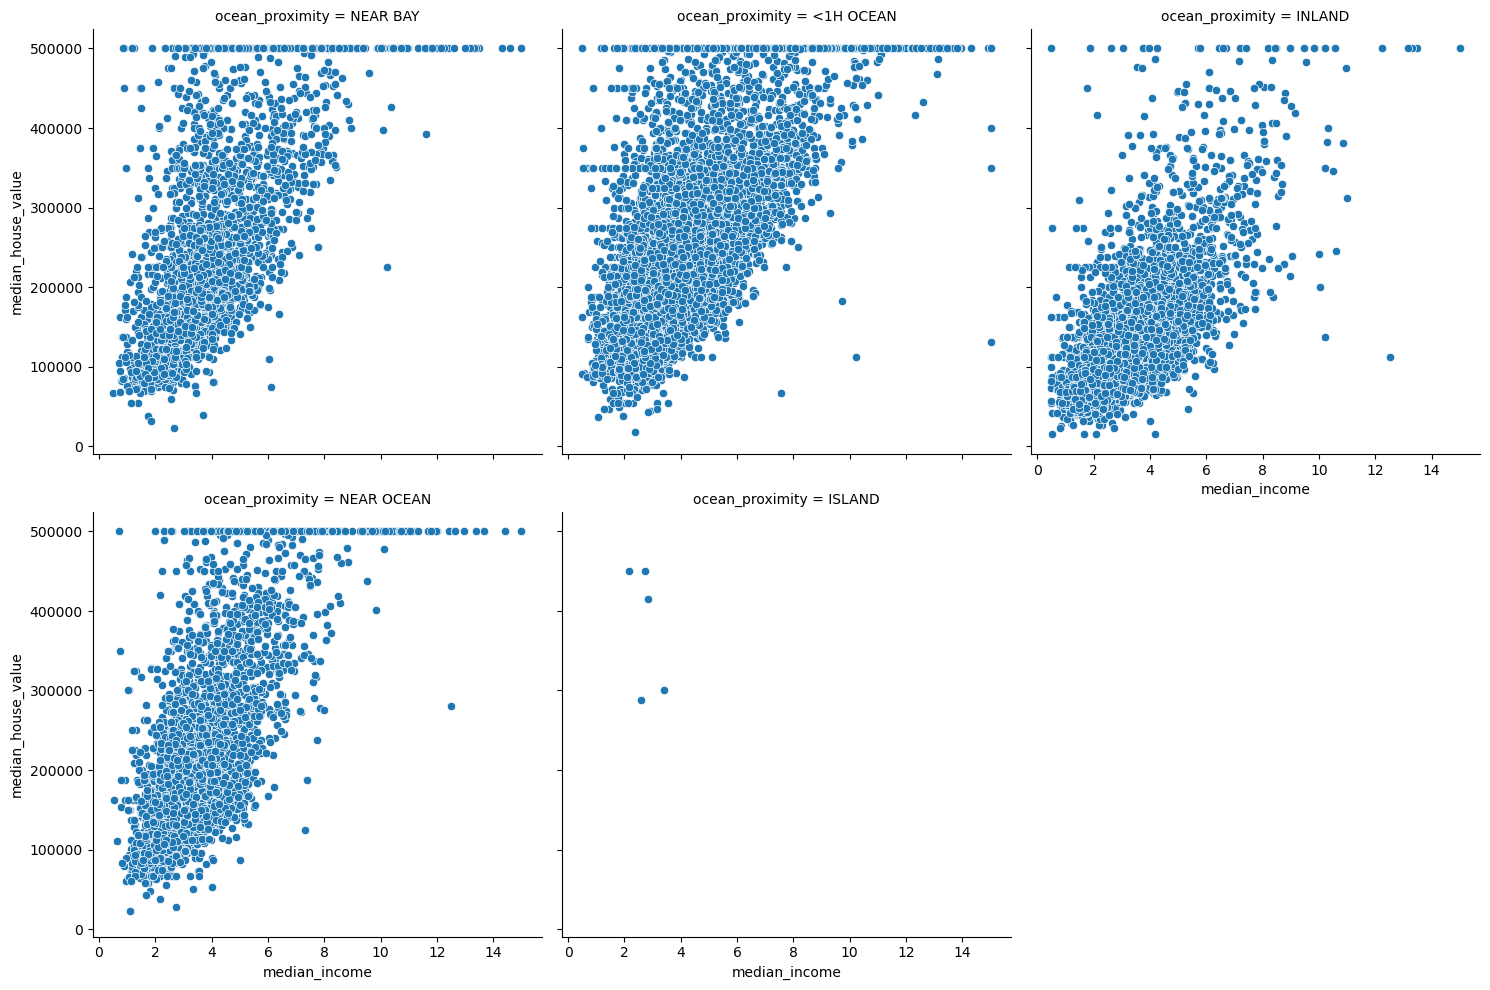

In [12]:
## scatter plot with median_house_value and median_income at each ocean_proximity
sns.relplot(x='median_income', y='median_house_value', data=df_housing, kind='scatter', col='ocean_proximity',
            col_wrap=3)
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


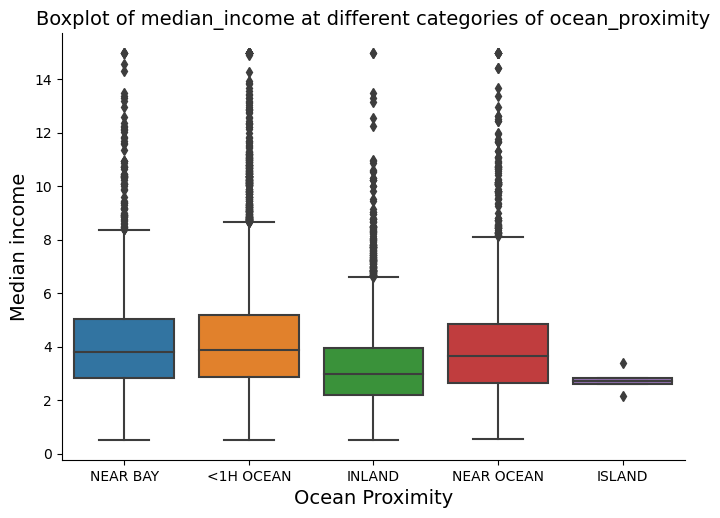

In [13]:
## Boxplot of median_income at different categories of ocean_proximity
sns.catplot(y='median_income', x='ocean_proximity', data=df_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of median_income at different categories of ocean_proximity', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median income', fontsize=14, c='k')
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


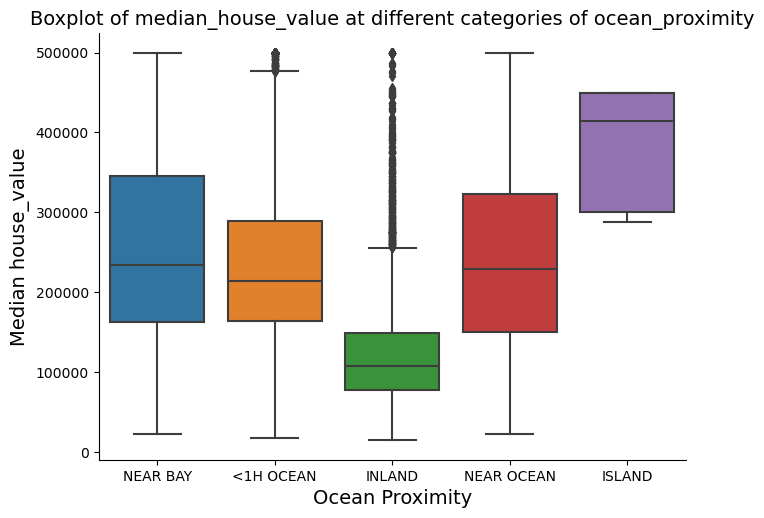

In [14]:
## Boxplot of median_house_value at different categories of ocean_proximity
sns.catplot(y='median_house_value', x='ocean_proximity', data=df_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of median_house_value at different categories of ocean_proximity', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median house_value', fontsize=14, c='k')
plt.show()

#### It seems that the distribution of median_income is almost the same at ocean_proximity categories, also it seems that INLAND median_income and median_house_value is less than other categories and it makes sense.

# MultiVariate Visualization

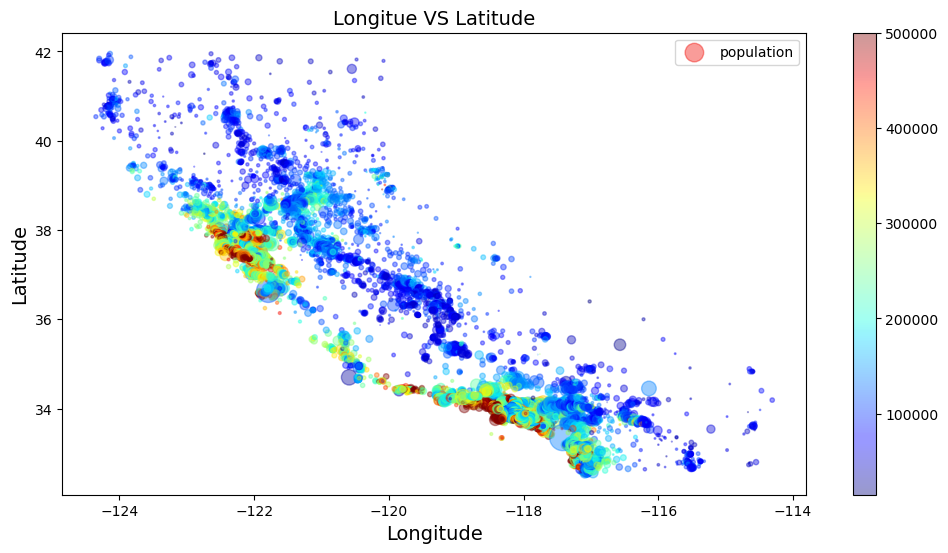

In [25]:
## scatter plot for longitude & latitude and add population as the size of the point and the color as house_value
plt.figure(figsize=(12,6))
sc=plt.scatter(df_housing['longitude'], df_housing['latitude'], s=df_housing['population']/100,
              alpha=0.4, c=df_housing['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitue VS Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

#### it seems that the prices is higher near the ocean than other zones, and also these areas have higher population

# Feature Engineering

In [18]:
df_housing['rooms_per_household']= df_housing['total_rooms']/ df_housing['households']
df_housing['bedrooms_per_rooms']= df_housing['total_bedrooms']/ df_housing['total_rooms']
df_housing['population_per_households']= df_housing['population']/ df_housing['households']

In [21]:
# Split the dataset

In [22]:
X=df_housing.drop(columns=['median_house_value'], axis=1)
y=df_housing['median_house_value']

In [27]:
X_train_full, X_test, y_train_full, y_test= train_test_split(X,y, test_size=0.15, random_state=123, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=123,
                                                      shuffle=True)
## check shape
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_valid.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (14035, 12)
y_train shape: (14035,)
X_valid shape: (3509, 12)
y_valid shape: (3509,)
X_test shape: (3096, 12)
y_test shape: (3096,)


# Dealing with nulls

In [28]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20433 non-null  float64
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  object 
 10  rooms_per_household        20640 non-null  float64
 11  bedrooms_per_rooms         20433 non-null  float64
 12  population_per_households  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ M

In [48]:
# separate the columns according to type (numerical or categorical)
nums_col= [col for col in X_train.columns if X_train[col].dtype in ['float64', 'int64']]
categ_col= [col for col in X_train.columns if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical cols :\n', nums_col)
print('**'*30)
print('Categorical cols :\n', categ_col)

Numerical cols :
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_rooms', 'population_per_households']
************************************************************
Categorical cols :
 ['ocean_proximity']


In [31]:
# impute the nulls with median
imputer = SimpleImputer(strategy='median')
# fit and transform numerical data
X_train_filled=imputer.fit_transform(X_train[nums_col])

# transform valid and test datasets
X_valid_filles= imputer.fit_transform(X_valid[nums_col])
X_test_filles= imputer.fit_transform(X_test[nums_col])

# Standardize the dataset

In [33]:
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_filled)
X_valid_scaled=scaler.fit_transform(X_valid_filles)
X_test_scaled=scaler.fit_transform(X_test_filles)

# PipeLine for numerical features

In [34]:
num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
X_train_num= num_pipeline.fit_transform(X_train[nums_col])
X_valid_num= num_pipeline.fit_transform(X_valid[nums_col])
X_test_num= num_pipeline.fit_transform(X_test[nums_col]) 

# Encoding Categorical Features

In [36]:
lbl_encoder=LabelEncoder()
X_train_encoded= lbl_encoder.fit_transform(X_train[categ_col].values[:,0])
X_valid_encoded= lbl_encoder.fit_transform(X_valid[categ_col].values[:,0])
X_test_encoded= lbl_encoder.fit_transform(X_test[categ_col].values[:,0])

# PipeLine for Categorical features

In [39]:
categ_pipeline= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('OHE', OneHotEncoder(sparse=False))])
X_train_categ= categ_pipeline.fit_transform(X_train[categ_col])
X_valid_categ= categ_pipeline.fit_transform(X_valid[categ_col])
X_test_categ= categ_pipeline.fit_transform(X_test[categ_col]) 

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Get all together

In [49]:
num_pipeline= Pipeline([
    ('selector', DataFrameSelector(nums_col)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categ_pipeline= Pipeline(steps=[
    ('selector', DataFrameSelector(categ_col)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('OHE', OneHotEncoder(sparse=False))])

total_pipeline= FeatureUnion(transformer_list=[
    ('num_pip', num_pipeline),
    ('categ_pip', categ_pipeline)])

X_train_final=total_pipeline.fit_transform(X_train)
X_valid_final=total_pipeline.fit_transform(X_valid)
X_test_final=total_pipeline.fit_transform(X_test)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Building ML Models

#### Evaluation metric : RMSE

### Linear Regression

In [51]:
# define the model
lin_reg= LinearRegression()
lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [54]:
# prediction
y_pred_train_lin = lin_reg.predict(X_train_final)
y_pred_valid_lin= lin_reg.predict(X_valid_final)

# RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin))**0.5

# R2
r2_train_lin=r2_score(y_train, y_pred_train_lin)
r2_valid_lin=r2_score(y_valid, y_pred_valid_lin)

print(f'RMSE for training set using Linear Regression : {rmse_train_lin:.3f}')
print(f'RMSE for validating set using Linear Regression : {rmse_valid_lin:.3f}')
print('**'*40)
print(f'R2 for training set using Linear Regression : {r2_train_lin:.3f}')
print(f'R2 for validating set using Linear Regression : {r2_valid_lin:.3f}')



RMSE for training set using Linear Regression : 67566.770
RMSE for validating set using Linear Regression : 68291.327
********************************************************************************
R2 for training set using Linear Regression : 0.655
R2 for validating set using Linear Regression : 0.648


# SGD Regression

In [57]:
## define model
sgd_reg=SGDRegressor(penalty=None, eta0=0.001, shuffle=True, max_iter=10000)
sgd_reg.fit(X_train_final, y_train)

SGDRegressor(eta0=0.001, max_iter=10000, penalty=None)

In [58]:
# prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)
y_pred_valid_sgd= sgd_reg.predict(X_valid_final)

# RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5

# R2
r2_train_sgd=r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd=r2_score(y_valid, y_pred_valid_sgd)

print(f'RMSE for training set using Linear Regression : {rmse_train_sgd:.3f}')
print(f'RMSE for validating set using Linear Regression : {rmse_valid_sgd:.3f}')
print('**'*40)
print(f'R2 for training set using Linear Regression : {r2_train_sgd:.3f}')
print(f'R2 for validating set using Linear Regression : {r2_valid_sgd:.3f}')

RMSE for training set using Linear Regression : 67658.755
RMSE for validating set using Linear Regression : 68404.935
********************************************************************************
R2 for training set using Linear Regression : 0.655
R2 for validating set using Linear Regression : 0.647
